In [62]:
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline  
import pandas as pd
from time import sleep
import numpy as np
from IPython import display

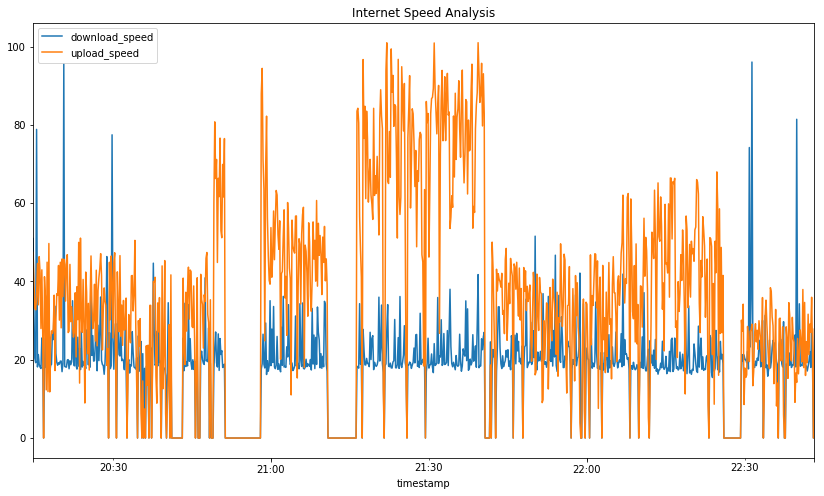

In [65]:
def get_data():
    conn = sqlite3.connect('internet_speed.db')
    c = conn.cursor()
    query = "Select * from Internet_Speed"
    c.execute(query)
    data = c.fetchall()
    c.close()
    return data

plt.close()
data = get_data()
df = pd.DataFrame(data, columns=['timestamp','download_speed', 
                                 'upload_speed', 'ping_time'])
df.index = pd.to_datetime(df['timestamp'])
del df['timestamp']
df = df.resample('10S').mean()
df[df.isnull()] = 0
df[['download_speed', 'upload_speed']].plot(figsize=[14, 8])
plt.title("Internet Speed Analysis")
plt.show()


In [43]:
input_vector = df['download_speed'].values


def get_spectral_values(vector):
    N = len(vector)   
    X = np.fft.rfft(vector, axis=0)/N
    return(abs(X[1:]))

def get_spectral_frequencies(vector, dt_seconds=300):
    return np.fft.fftfreq(len(vector), d=dt_seconds)

def get_spectral_periods(vector, dt_seconds=300):
    spectral_frequencies = get_spectral_frequencies(vector, 
                                                    dt_seconds)
    return 1/spectral_frequencies/3600

spectral_mag = get_spectral_values(input_vector)

periods = get_spectral_periods(spectral_mag, 5)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


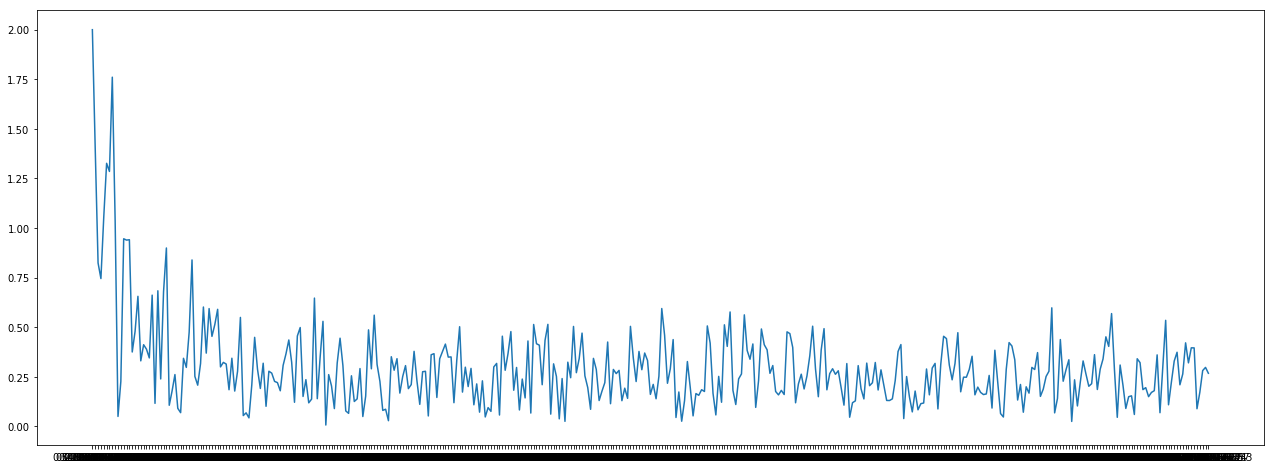

In [57]:
plt.figure(figsize=(22, 8))
plt.plot(spectral_mag)
test = plt.xticks(np.arange(len(spectral_mag)), periods)

In [59]:
0.54583333*24

13.09999992